In [1]:
#Marketing Project for RMDS

In [2]:
# Data Source(s):
# US Bureau of Labor Statistics (May 2019)
# National Center for Education Statistics (NCES) (2018-2019)

In [3]:
import os.path
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json

#some plot stuff
sns.set_style('darkgrid')
plt.rcParams["font.family"] = 'monospace'

In [4]:
data = "/Users/skasralikar/Desktop/github/rmds/datasets"
state = pd.read_csv(os.path.join(data,'job_state.csv'), sep =',')
city = pd.read_csv(os.path.join(data, 'job_city.csv'), sep =',')
majors = pd.read_csv(os.path.join(data, 'CS_majors.csv'), sep = ',')
statecode = pd.read_csv(os.path.join(data, 'state_code.csv'),sep = ',')

In [5]:
state.isnull().any()
city.isnull().any()
majors.isnull().any()

UnitID                                                              False
Institution Name                                                    False
FIPS state code (HD2018)                                            False
Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)     True
Unnamed: 4                                                           True
dtype: bool

In [6]:
#define tech values
tech = "Computer and Information Systems Managers|Computer and Mathematical Occupations|Computer Occupations, All Other"

In [7]:
#filter out tech jobs from original dataframe
statetech = state[state['occ_title'].str.contains(tech)]

In [8]:
#job_state.csv string values into numerical

#strip unwanted string values
statetech['tot_emp'] = statetech['tot_emp'].str.rstrip('**')
statetech['tot_emp'] = statetech['tot_emp'].str.replace(',','')

#convert string into integer and replace NaN vals with 0
statetech['tot_emp'] = pd.to_numeric(statetech['tot_emp'], errors ='coerce')
statetech = statetech.replace(np.nan, 0, regex=True)

#sum tech jobs per state
statetech = statetech.groupby(['area_title']).sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [9]:
statetech.head()

,tot_emp
area_title,
Alabama,49960.0
Alaska,6200.0
Arizona,114620.0
Arkansas,25580.0
California,803270.0


In [10]:
citytech = city[city['occ_title'].str.contains(tech)]

In [11]:
citytech = citytech.drop(['area_title'], axis = 1)

In [12]:
#city_state.csv string values into numerical

#strip unwanted string values
citytech['tot_emp'] = citytech['tot_emp'].str.rstrip('**')
citytech['tot_emp'] = citytech['tot_emp'].str.replace(',','')

#convert string into integer and replace NaN vals with 0
citytech['tot_emp'] = pd.to_numeric(citytech['tot_emp'], errors ='coerce')

#delete nulls
citytech.isnull().any()
citytech.dropna()

#sum tech jobs per city per state
citytechfinal = citytech.groupby(['City', 'State']).sum()

In [13]:
citytechfinal.head()

tot_emp
City                      State             
Abilene,                  Texas        720.0
Akron,                    Ohio       10970.0
Albany,                   Georgia      880.0
                          Oregon       390.0
Albany-Schenectady-Troy,  New York   18990.0

In [70]:
#Midwestern city division

#Louisiana
Louisiana = citytech[citytech['State'].str.contains("Louisiana", na=False)]
Louisiana = Louisiana.groupby(['City']).sum()

In [15]:
#Mississippi
Mississippi = citytech[citytech['State'].str.contains("Mississippi", na=False)]
Mississippi = Mississippi.groupby(['City']).sum()

In [16]:
#Oklahoma
Oklahoma = citytech[citytech['State'].str.contains("Oklahoma", na=False)]
Oklahoma = Oklahoma.groupby(['City']).sum()

In [17]:
#Missouri
Missouri = citytech[citytech['State'].str.contains("Missouri", na=False)]
Missouri = Missouri.groupby(['City']).sum()

In [18]:
majors.isnull().any()

UnitID                                                              False
Institution Name                                                    False
FIPS state code (HD2018)                                            False
Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)     True
Unnamed: 4                                                           True
dtype: bool

In [19]:
majors

,UnitID,Institution Name,FIPS state code (HD2018),Grand total (EF2018CP 14.0000-Engineering Undergraduate total),Unnamed: 4
0,177834,A T Still University of Health Sciences,29,NaN,NaN
1,180203,Aaniiih Nakoda College,30,NaN,NaN
2,491464,ABC Adult School,6,NaN,NaN
3,493105,ABC Adult School - Cabrillo Lane,6,NaN,NaN
4,459523,ABC Beauty Academy,48,NaN,NaN
...,...,...,...,...,...
6697,413820,Yukon Beauty College Inc,40,NaN,NaN
6698,451237,Z Hair Academy,20,NaN,NaN
6699,204255,Zane State College,39,NaN,NaN
6700,458575,Zaytuna College,6,NaN,NaN


In [20]:
majors = majors.drop(['UnitID', 'Unnamed: 4'], axis = 1)
majors = majors.dropna()

In [21]:
majors = majors.merge(statecode, left_on = 'FIPS state code (HD2018)', right_on = 'Value')

In [22]:
majors

,Institution Name,FIPS state code (HD2018),Grand total (EF2018CP 14.0000-Engineering Undergraduate total),VariableName,Value,ValueLabel
0,Abilene Christian University,48,117.0,FIPS state code (HD2018),48,Texas
1,Angelo State University,48,158.0,FIPS state code (HD2018),48,Texas
2,Austin Community College District,48,1825.0,FIPS state code (HD2018),48,Texas
3,Baylor University,48,605.0,FIPS state code (HD2018),48,Texas
4,Houston Baptist University,48,25.0,FIPS state code (HD2018),48,Texas
...,...,...,...,...,...,...
726,University of North Dakota,38,1654.0,FIPS state code (HD2018),38,North Dakota
727,Valley City State University,38,18.0,FIPS state code (HD2018),38,North Dakota
728,University of Alaska Anchorage,2,719.0,FIPS state code (HD2018),2,Alaska
729,University of Alaska Fairbanks,2,502.0,FIPS state code (HD2018),2,Alaska


In [23]:
#midwestern universities
LouisianaU = majors[majors['ValueLabel'].str.contains("Louisiana", na=False)]
MississippiU = majors[majors['ValueLabel'].str.contains("Mississippi", na=False)]
MissouriU = majors[majors['ValueLabel'].str.contains("Missouri", na=False)]
OklahomaU = majors[majors['ValueLabel'].str.contains("Oklahoma", na=False)]

In [24]:
#graph time

In [25]:
#geopanda
statemap = gpd.read_file(os.path.join(data, 'state/cb_2018_us_state_5m.shp'), sep=',')
ua = gpd.read_file(os.path.join(data, 'ua/cb_2018_us_ua10_500k.shp'), sep=',')

In [26]:
LouisianaU

,Institution Name,FIPS state code (HD2018),Grand total (EF2018CP 14.0000-Engineering Undergraduate total),VariableName,Value,ValueLabel
706,Louisiana State University and Agricultural & ...,22,4138.0,FIPS state code (HD2018),22,Louisiana
707,Louisiana Tech University,22,1810.0,FIPS state code (HD2018),22,Louisiana
708,McNeese State University,22,682.0,FIPS state code (HD2018),22,Louisiana
709,Southern University and A & M College,22,508.0,FIPS state code (HD2018),22,Louisiana
710,Tulane University of Louisiana,22,376.0,FIPS state code (HD2018),22,Louisiana
711,University of Louisiana at Lafayette,22,1829.0,FIPS state code (HD2018),22,Louisiana
712,University of New Orleans,22,940.0,FIPS state code (HD2018),22,Louisiana


In [27]:
#merge shapefile and tech jobs per state info and delete Alaska/Hawaii
statetech1 = statemap.merge(statetech, left_on = 'NAME', right_on = 'area_title')
statetech1 = statetech1.loc[~statetech1['NAME'].isin(['Alaska','Hawaii'])]

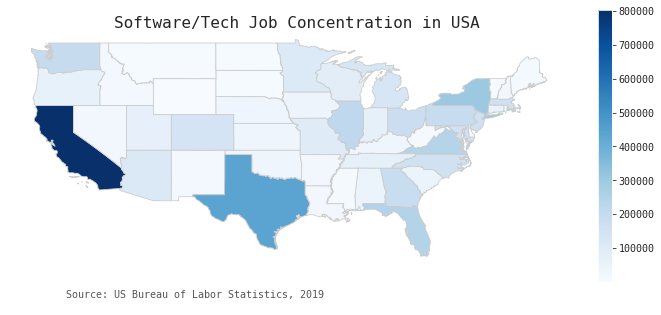

In [156]:
#Job Division by US Map
vmin, vmax = 890, 803270

fig,ax = plt.subplots(1, figsize =(12,5))
statetech1.plot(column= 'tot_emp', cmap = 'Blues', linewidth=0.8, ax=ax, edgecolor = '0.8' )
ax.axis('off')

colorbar = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
colorbar._A = []
cbar = fig.colorbar(colorbar)

ax.set_title('Software/Tech Job Concentration in USA', \
              fontdict={'fontsize': '16',
                        'fontweight' : '3'})

ax.annotate('Source: US Bureau of Labor Statistics, 2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

plt.xlim(-125,-65)
plt.ylim(25,50)

fig.savefig('TechJobDivisionUS.png', dpi=300)

Text(0.5, 1.0, 'Software/Tech Job Division per State')

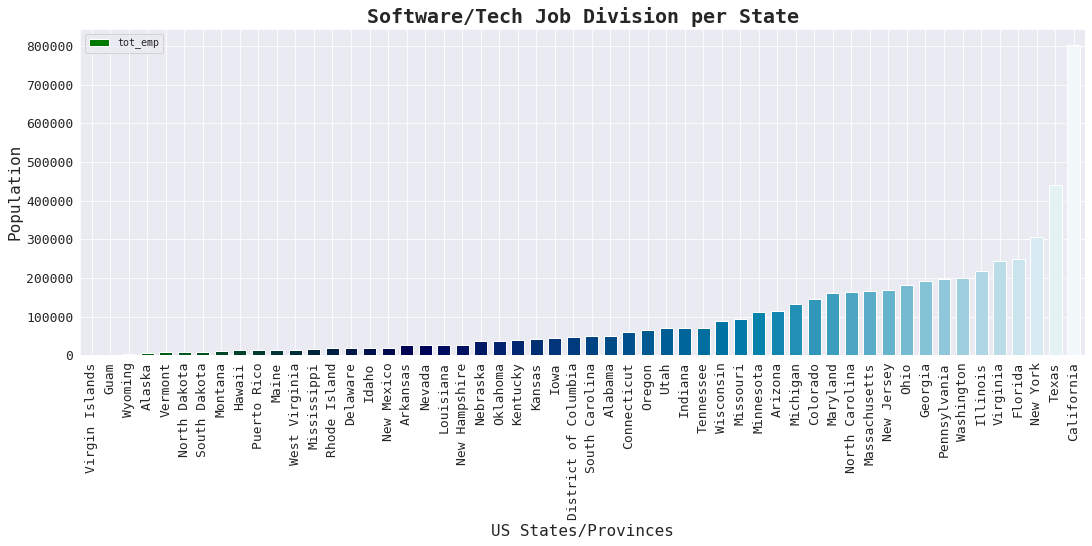

In [141]:
#Job Division per State (US)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

pal = sns.color_palette("ocean", len(statetech))
statetech.sort_values(by = ['tot_emp']).plot(ax = ax, y = 'tot_emp', kind = 'bar', fontsize = 13, color = pal, width = 0.7)

ax1.legend(["Number of Jobs"])
plt.ylabel('Population', fontsize = 16)
plt.xlabel('US States/Provinces', fontsize = 16)
plt.title('Software/Tech Job Division per State', fontsize = 20, fontweight = 'bold')

fig.savefig('TechJobDivisionUSbar.png', dpi=300)

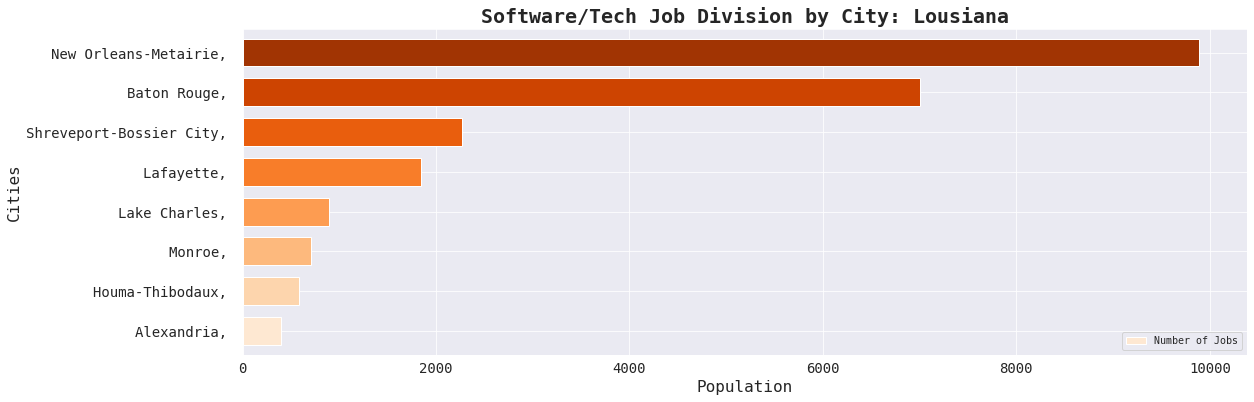

In [157]:
#Louisiana 
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

pal = sns.color_palette("Oranges", len(Louisiana))
x = Louisiana.sort_values(by = ['tot_emp']).plot(ax = ax1, y = 'tot_emp', kind = 'barh', fontsize = 14, color = pal, width = .7)


ax1.legend(["Number of Jobs"])
plt.xlabel('Population', fontsize = 16)
plt.ylabel('Cities', fontsize = 16)
plt.title('Software/Tech Job Division by City: Lousiana', fontsize = 20, fontweight = 'bold')

fig.savefig('LouisianaTech.png', dpi=300)

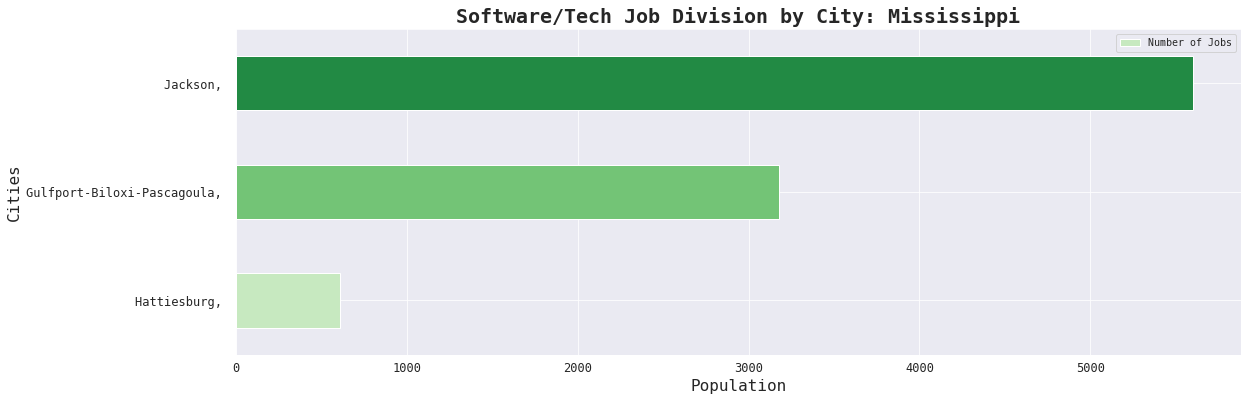

In [158]:
#Mississippi
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

pal = sns.color_palette("Greens", len(Mississippi))
x = Mississippi.sort_values(by = ['tot_emp']).plot(ax = ax1, y = 'tot_emp', kind = 'barh', fontsize = 12, color = pal)
    
ax1.legend(["Number of Jobs"])
plt.xlabel('Population', fontsize = 16)
plt.ylabel('Cities', fontsize = 16)
plt.title('Software/Tech Job Division by City: Mississippi', fontsize = 20, fontweight = 'bold')

fig.savefig('TechMississippi.png', dpi=300)

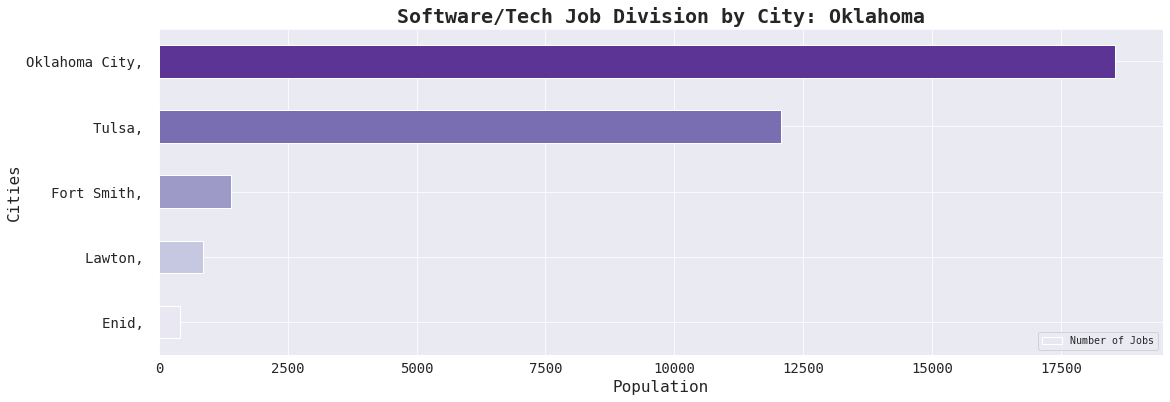

In [159]:
#Oklahoma
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

pal = sns.color_palette("Purples", len(Oklahoma))
x = Oklahoma.sort_values(by = ['tot_emp']).plot(ax = ax1, y = 'tot_emp', kind = 'barh', fontsize = 14, color = pal)
    
ax1.legend(["Number of Jobs"])
plt.xlabel('Population', fontsize = 16)
plt.ylabel('Cities', fontsize = 16)
plt.title('Software/Tech Job Division by City: Oklahoma', fontsize = 20, fontweight = 'bold')

fig.savefig('TechOklahoma.png', dpi=300)

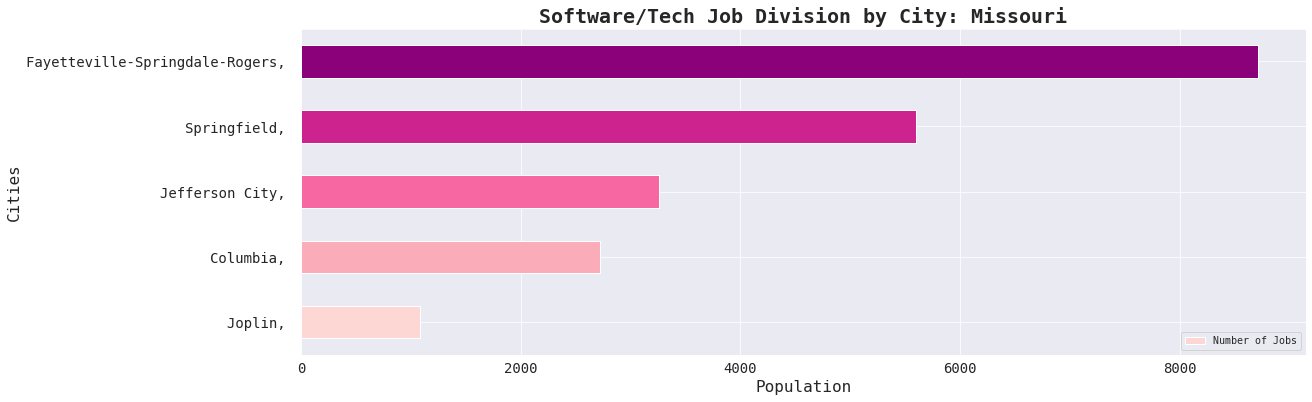

In [165]:
#Missouri
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(111)

pal = sns.color_palette("RdPu", len(Missouri))
x = Missouri.sort_values(by = ['tot_emp']).plot(ax = ax1, y = 'tot_emp', kind = 'barh', fontsize = 14, color = pal)
    
ax1.legend(["Number of Jobs"])
plt.xlabel('Population', fontsize = 16)
plt.ylabel('Cities', fontsize = 16)
plt.title('Software/Tech Job Division by City: Missouri', fontsize = 20, fontweight = 'bold')

fig.savefig('TechMissouri.png', dpi=300)

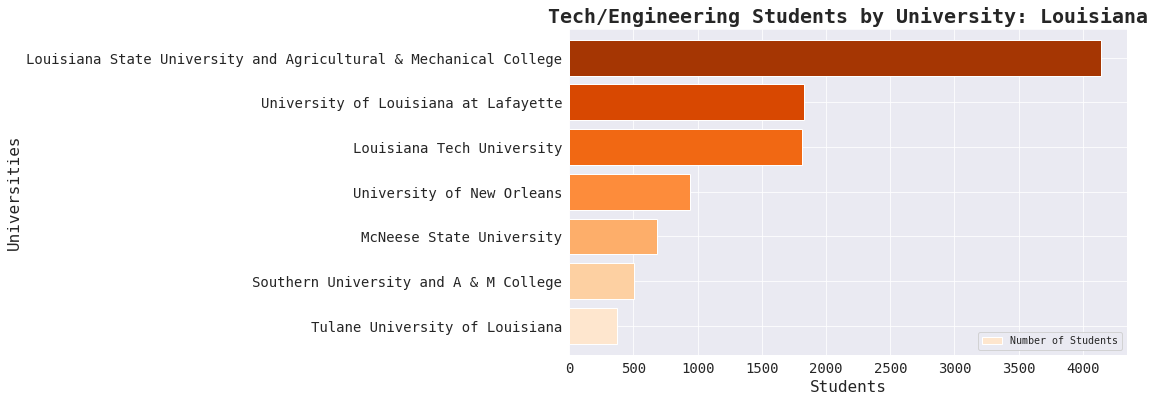

In [168]:
#LouisianaU
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

a= 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)'
pal = sns.color_palette("Oranges", len(LouisianaU))

b = LouisianaU.sort_values(by = [a]).plot(x = 'Institution Name', y = a, ax = ax, kind = 'barh', fontsize = 14, color = pal, width = 0.8)

ax.legend(["Number of Students"])
plt.xlabel('Students', fontsize = 16)
plt.ylabel('Universities', fontsize = 16)
plt.title('Tech/Engineering Students by University: Louisiana', fontsize = 20, fontweight = 'bold')

fig.savefig('LouisianaUEngineering.png', dpi=300)

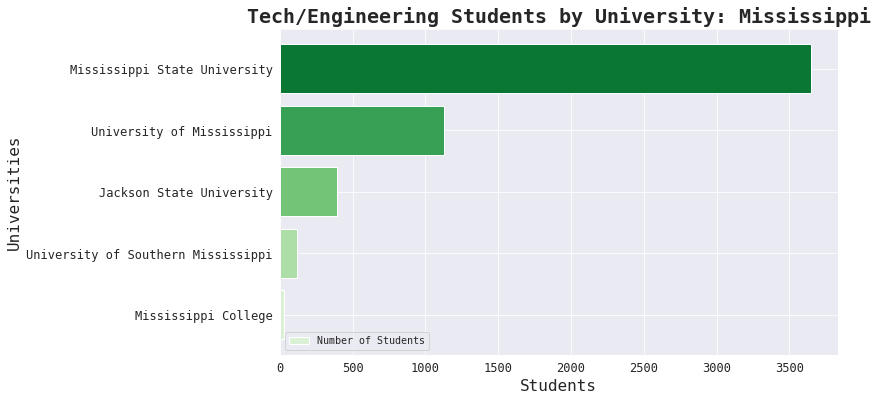

In [169]:
#MississippiU
fig = plt.figure(figsize=(
    10,6))
ax = fig.add_subplot(111)

pal = sns.color_palette("Greens", len(MississippiU))

MississippiU.sort_values(by = ['Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)']).plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax, kind = 'barh', fontsize = 12, color = pal, width = 0.8)

ax.legend(["Number of Students"])
plt.xlabel('Students', fontsize = 16)
plt.ylabel('Universities', fontsize = 16)
plt.title('Tech/Engineering Students by University: Mississippi', fontsize = 20, weight = 'bold')

fig.savefig('MississippiUEngineering.png', dpi=300)

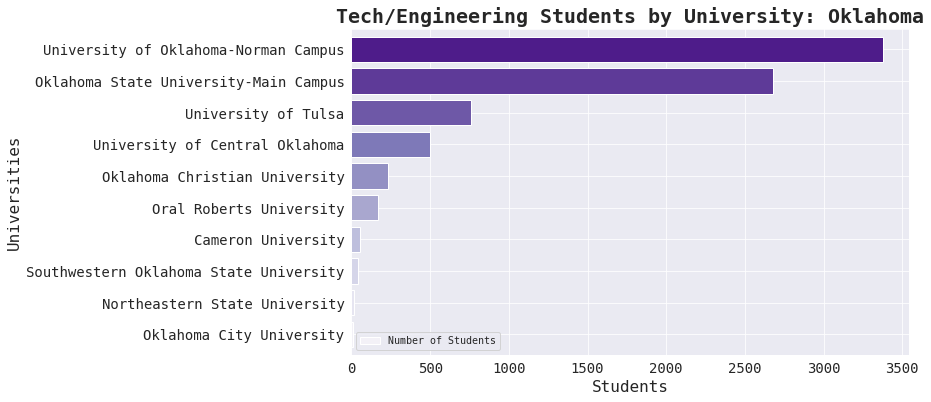

In [170]:
#OklahomaU
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

pal = sns.color_palette("Purples", len(OklahomaU))

OklahomaU.sort_values(by = ['Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)']).plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax, kind = 'barh', fontsize = 14, color = pal, width = 0.8)

ax.legend(["Number of Students"])
plt.xlabel('Students', fontsize = 16)
plt.ylabel('Universities', fontsize = 16)
plt.title('Tech/Engineering Students by University: Oklahoma', fontsize = 20, weight = 'bold')

fig.savefig('OklahomaUEngineering.png', dpi=300)


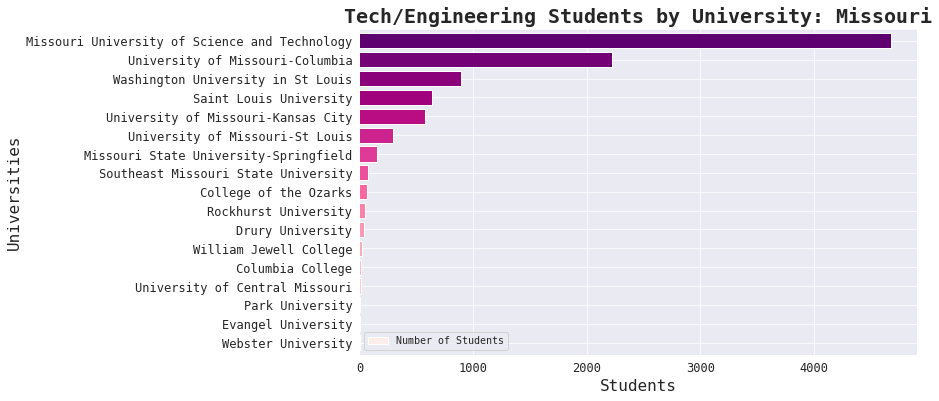

In [171]:
#MissouriU
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

pal = sns.color_palette("RdPu", len(MissouriU))

MissouriU.sort_values(by = ['Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)']).plot(x = 'Institution Name', y = 'Grand total (EF2018CP  14.0000-Engineering  Undergraduate total)', ax = ax, kind = 'barh', fontsize = 12, color = pal, width = 0.8)

ax.legend(["Number of Students"])
plt.xlabel('Students', fontsize = 16)
plt.ylabel('Universities', fontsize = 16)
plt.title('Tech/Engineering Students by University: Missouri', fontsize = 20, fontweight = 'bold')

fig.savefig('MissouriUEngineering.png', dpi=300)